<a href="https://colab.research.google.com/github/ajaikrishn/Magic-Gamma-ray-detection/blob/main/gamma_rays_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gamma Ray Detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_0=pd.read_csv('/content/drive/MyDrive/project_gamma/magic04.data')
df_0.columns=['Length', 'Width', 'Size', 'Conc', 'Conc1','Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist', 'class']
df_0

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


## **EDA**

In [ ]:
df_0.shape

(19019, 11)

In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length   19019 non-null  float64
 1   Width    19019 non-null  float64
 2   Size     19019 non-null  float64
 3   Conc     19019 non-null  float64
 4   Conc1    19019 non-null  float64
 5   Asym     19019 non-null  float64
 6   M3Long   19019 non-null  float64
 7   M3Trans  19019 non-null  float64
 8   Alpha    19019 non-null  float64
 9   Dist     19019 non-null  float64
 10  class    19019 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [ ]:
df_0.describe()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [ ]:
#shuffling the dataset
df=df_0.sample(frac=1,random_state=42,ignore_index=True)
df.reset_index(drop=True,inplace=True)
df

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,h
1,43.2691,19.8014,2.6977,0.2568,0.1314,-4.9028,-36.3290,-15.2182,1.5744,191.8810,g
2,95.9193,24.9227,3.3052,0.2273,0.1458,-26.8653,58.5770,-14.2839,7.4375,316.1220,g
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,h
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,h
...,...,...,...,...,...,...,...,...,...,...,...
19014,66.9575,40.3173,4.1294,0.0827,0.0424,62.7680,44.2846,-22.5145,3.9960,181.4330,g
19015,73.8130,20.0997,3.3252,0.2081,0.1152,-91.8746,59.6360,13.6028,5.7286,247.3950,g
19016,34.9637,14.2201,2.7709,0.3441,0.1856,7.8959,22.0566,10.7789,8.1460,175.8270,g
19017,36.2836,17.3307,2.6915,0.3438,0.1780,0.7674,22.2398,-11.6439,24.1910,148.5680,g


In [ ]:
features=[i for i in df.columns]

## **Distribution of the features using histogram**

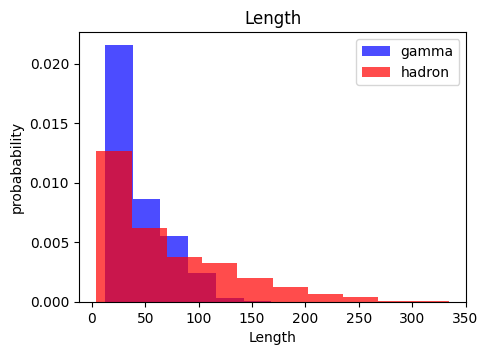

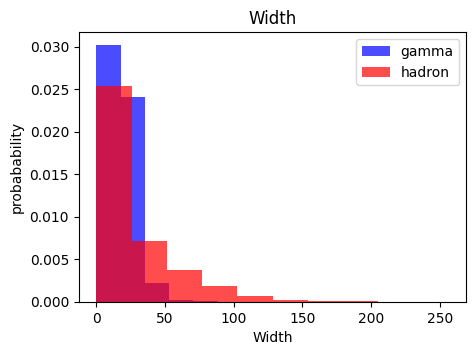

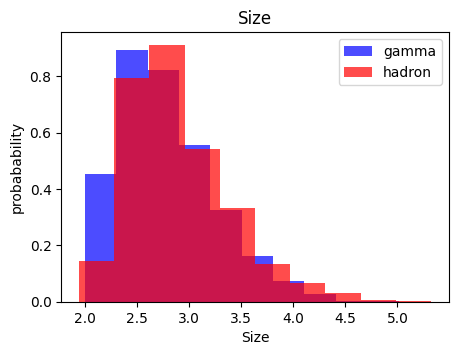

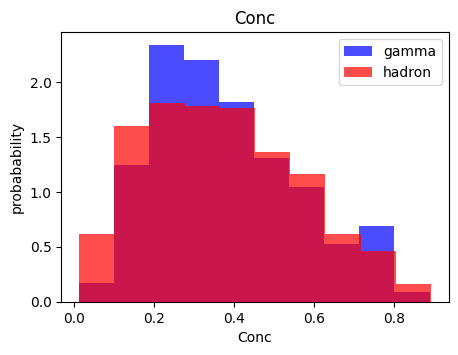

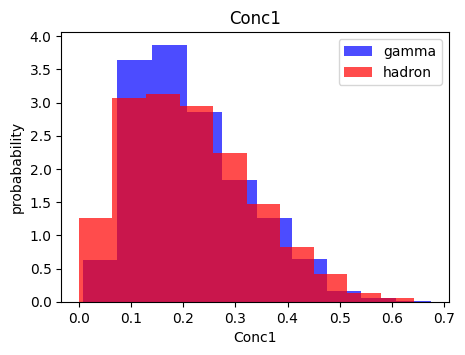

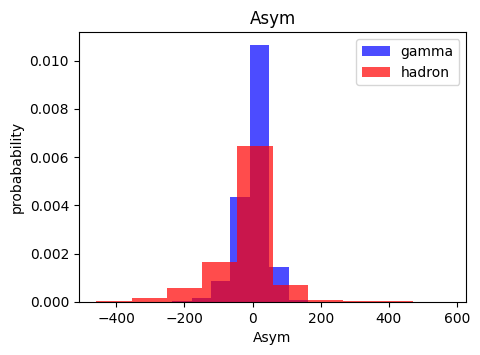

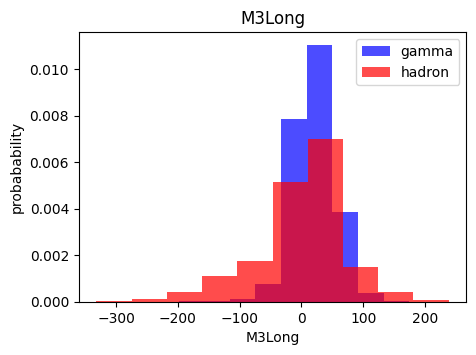

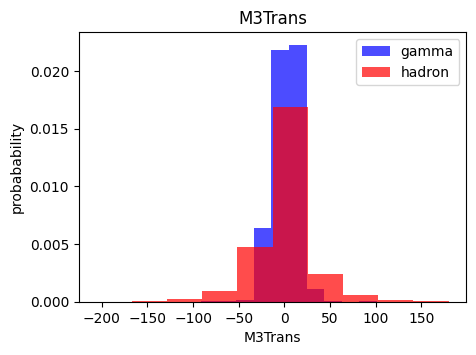

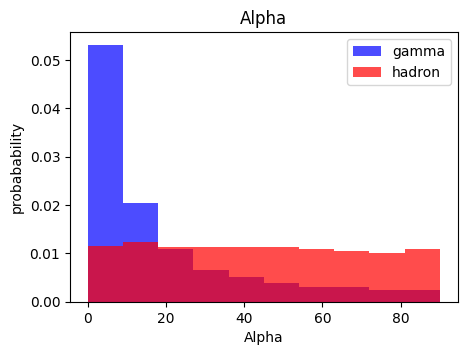

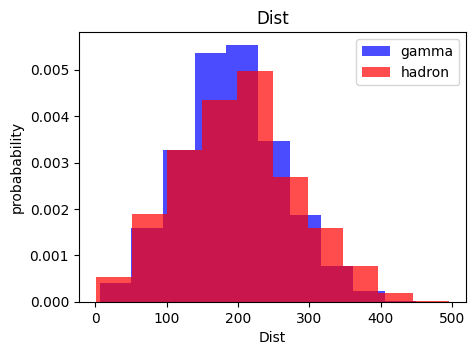

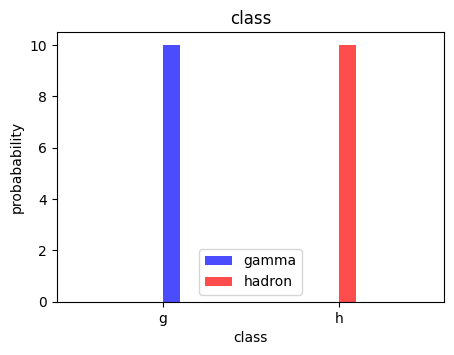

In [ ]:
for label in df[:-1]:
  plt.figure(figsize=(5,3.5))
  plt.hist(df[df['class']=='g'][label], color='blue', label='gamma', alpha=0.7, density=True) #density normalizes two distributions and makes easier to comapre. ex: 200 vs 10 bar hight not easy to comapre
  plt.hist(df[df['class']=='h'][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('probabability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

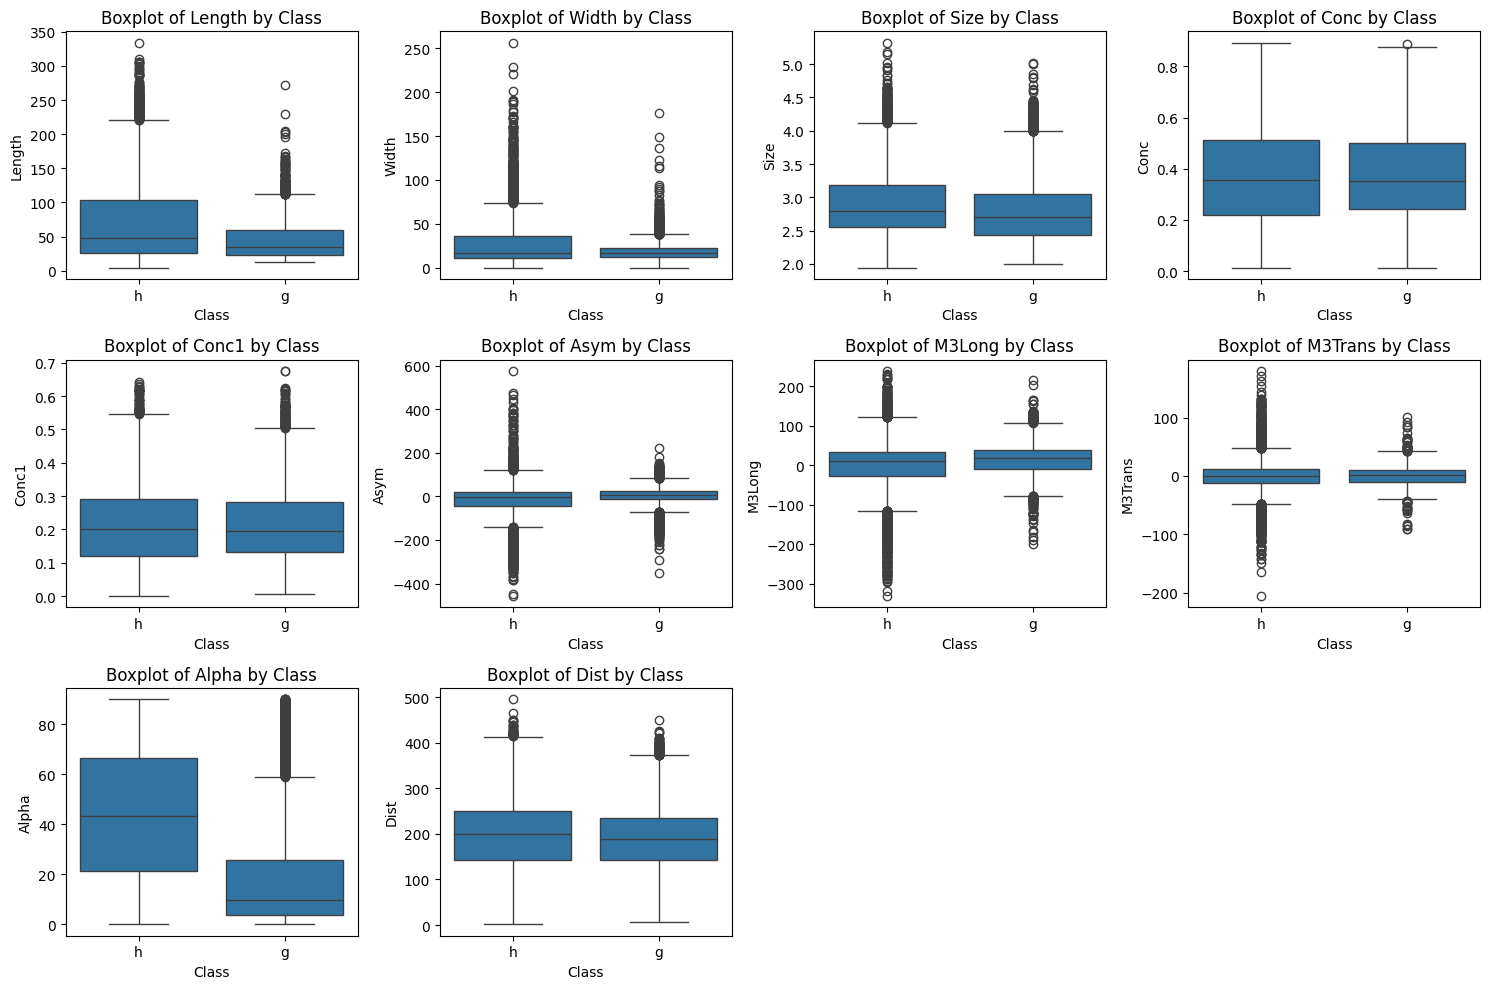

In [ ]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    if column not in numerical_columns:
        continue
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x='class', y=column)
    plt.title(f'Boxplot of {column} by Class')
    plt.xlabel('Class')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [ ]:
columns_with_outliers = ['Length', 'Width', 'Size', 'Conc1', 'Asym', 'M3Long', 'M3Trans','Alpha','Dist']
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, columns_with_outliers)


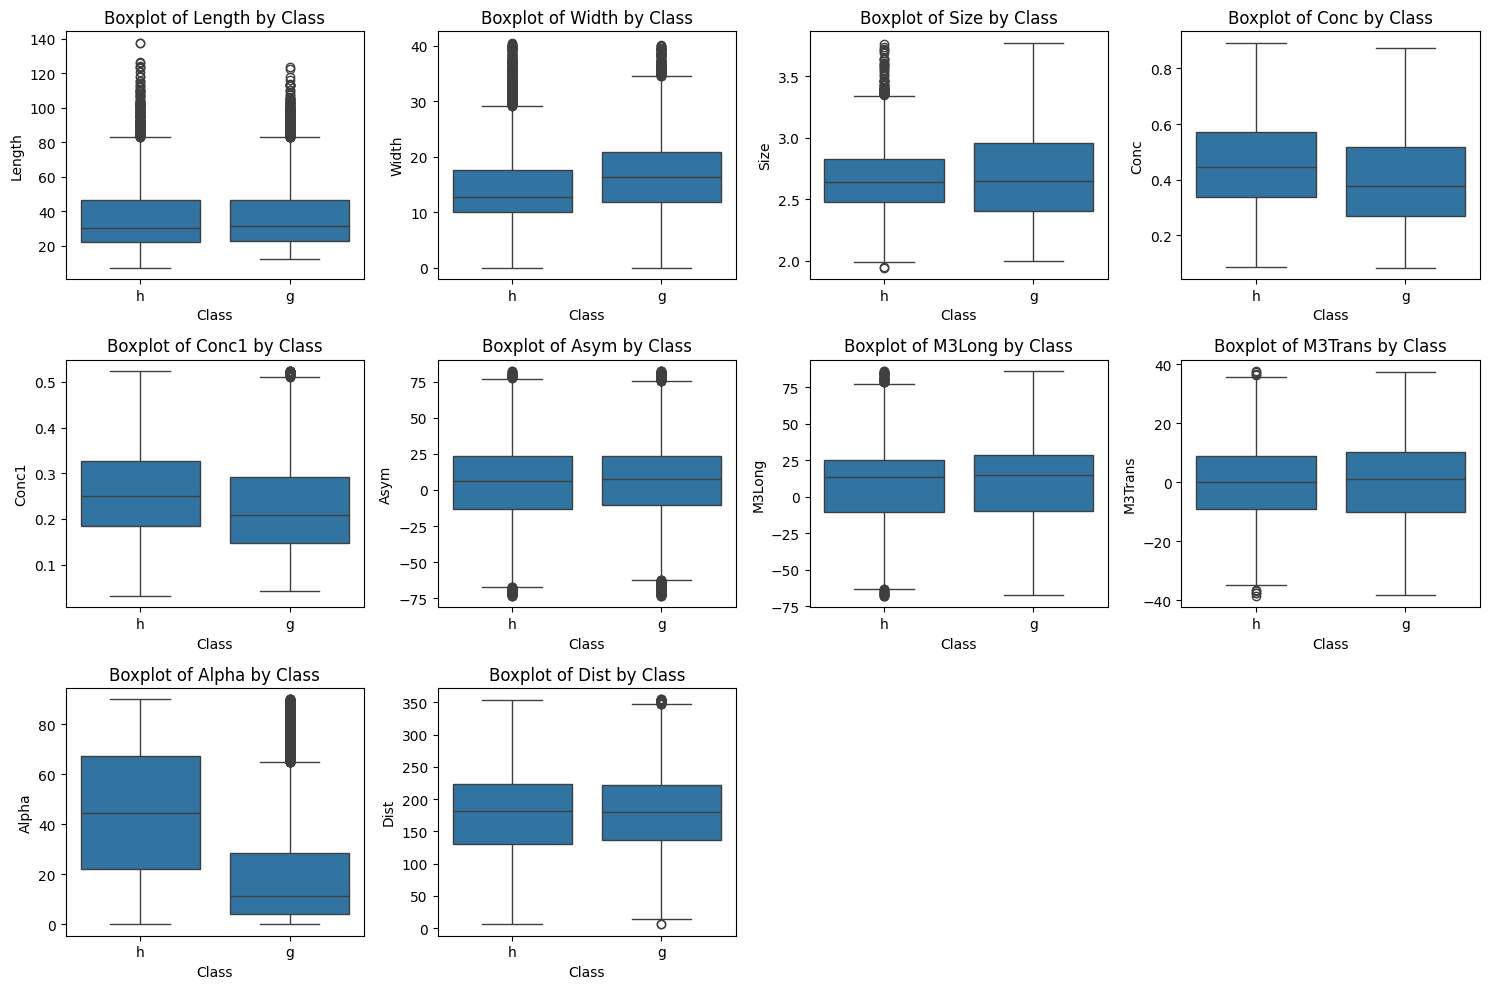

In [ ]:

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cleaned.columns):
    if column not in numerical_columns:
        continue
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_cleaned, x='class', y=column)
    plt.title(f'Boxplot of {column} by Class')
    plt.xlabel('Class')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [ ]:
x=df_cleaned.iloc[:,:-1]
x

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240
1,43.2691,19.8014,2.6977,0.2568,0.1314,-4.9028,-36.3290,-15.2182,1.5744,191.8810
2,95.9193,24.9227,3.3052,0.2273,0.1458,-26.8653,58.5770,-14.2839,7.4375,316.1220
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655
5,35.9270,14.8053,2.8189,0.3824,0.2314,-17.7292,-20.3995,-11.1370,5.9380,193.0310
...,...,...,...,...,...,...,...,...,...,...
19011,26.4285,16.5979,2.7578,0.3825,0.2017,2.5763,-12.4360,11.8841,1.0346,189.9560
19013,25.6931,10.1770,2.2889,0.4473,0.2288,-14.9790,17.8698,5.8346,28.1750,92.1703
19016,34.9637,14.2201,2.7709,0.3441,0.1856,7.8959,22.0566,10.7789,8.1460,175.8270
19017,36.2836,17.3307,2.6915,0.3438,0.1780,0.7674,22.2398,-11.6439,24.1910,148.5680


In [ ]:
y=df_cleaned.iloc[:,-1]
y

0        h
1        g
2        g
3        h
5        g
        ..
19011    g
19013    g
19016    g
19017    g
19018    h
Name: class, Length: 15033, dtype: object

## **FEATURE SELECTOIN**

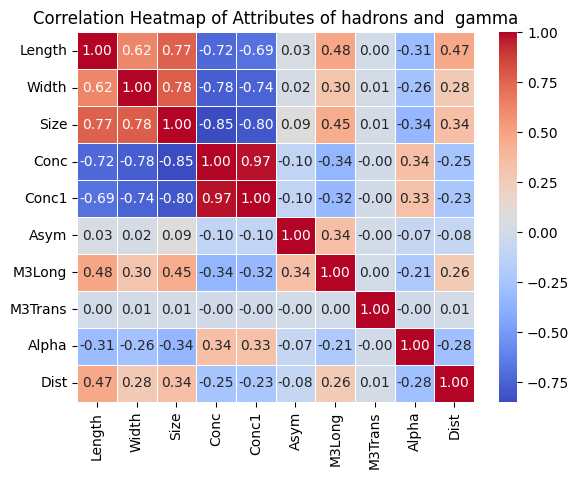

In [ ]:
#feature selection using heatmap
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Attributes of hadrons and  gamma')
plt.show()

In [ ]:
def correlation(df_cleaned,threshold):
  col_corr=set()
  corr_matrix=df_cleaned.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>=threshold:
         colname_i=corr_matrix.columns[i]
         colname_j=corr_matrix.columns[j]
         col_corr.add(colname_i)
         col_corr.add(colname_j)
  return col_corr

In [ ]:
corr_features=correlation(x,0.70)
len(set(corr_features))

5

In [ ]:
corr_features

{'Conc', 'Conc1', 'Length', 'Size', 'Width'}

In [ ]:
#feature selection using mutual information gain
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_info

array([0.02041027, 0.04667312, 0.07471069, 0.02655905, 0.01530152,
       0.        , 0.01837038, 0.01582961, 0.10068298, 0.00882061])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)

Alpha      0.100683
Size       0.074711
Width      0.046673
Conc       0.026559
Length     0.020410
M3Long     0.018370
M3Trans    0.015830
Conc1      0.015302
Dist       0.008821
Asym       0.000000
dtype: float64

<Axes: >

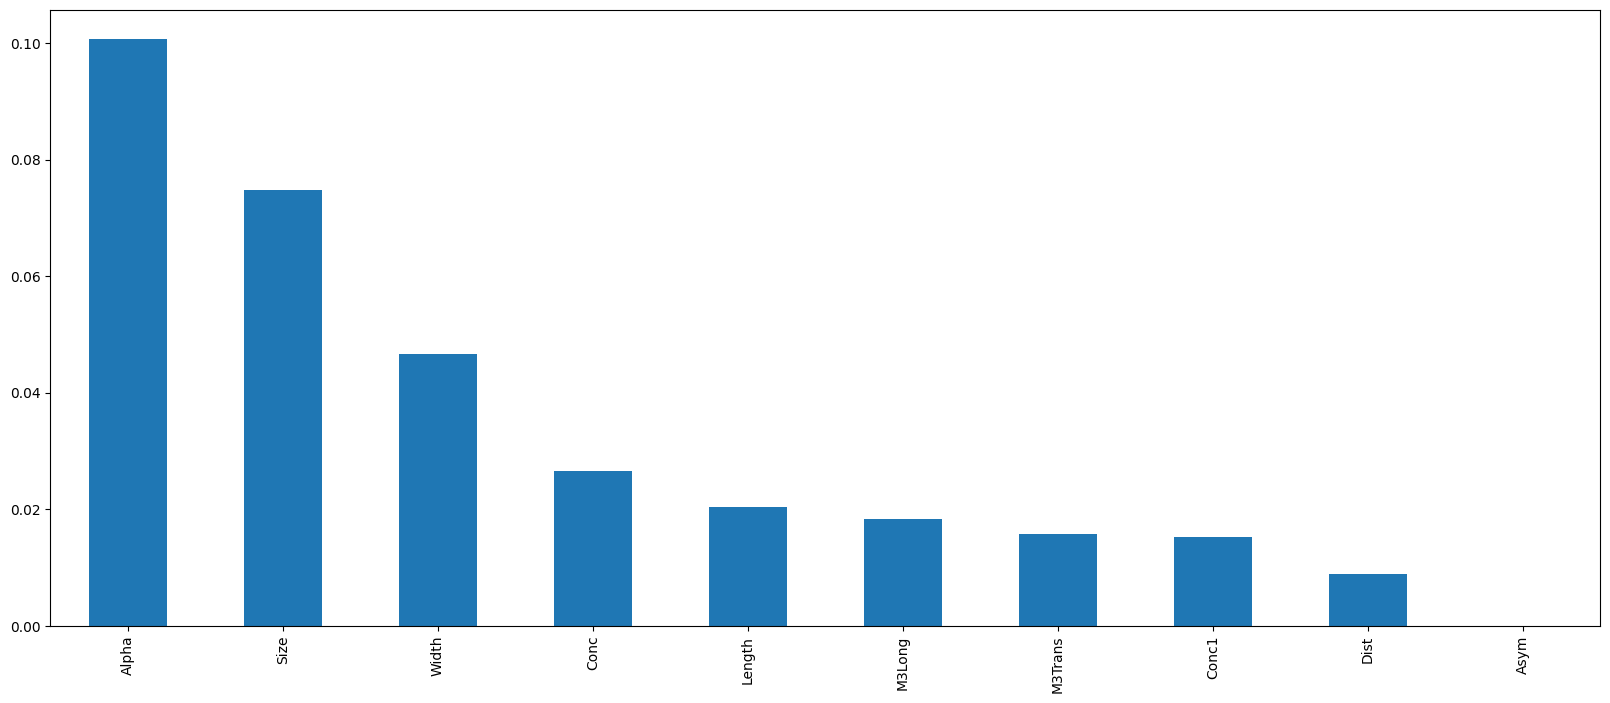

In [ ]:
#ploting the dependencies
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
1164,23.2007,9.7733,2.2788,0.5579,0.2921,-25.5851,-17.1035,-10.6575,30.7414,52.9858
10400,23.9986,15.3437,2.3909,0.4024,0.2297,13.2447,10.2886,-12.3888,10.8561,200.9570
17577,28.2315,13.2810,2.4591,0.6609,0.4239,-5.6691,22.7801,14.9629,10.6277,237.0969
9473,32.4537,5.4665,2.5422,0.6688,0.4798,24.5780,18.8733,-0.5899,14.2261,84.9994
1716,28.6020,0.0034,2.5340,0.6520,0.4254,7.6315,20.9890,0.0001,66.5460,169.9240
...,...,...,...,...,...,...,...,...,...,...
6610,126.5899,24.3644,3.2131,0.2186,0.0958,54.7354,71.0188,-16.3862,32.5813,106.2486
16983,34.8407,23.6243,2.9219,0.2896,0.1514,1.3326,23.0298,-14.9539,5.9938,187.4590
6874,64.3483,31.6370,3.5569,0.1490,0.0759,29.2215,59.7345,-26.0566,14.2235,163.9200
1102,20.3091,10.2339,2.4200,0.6616,0.3441,-5.1257,16.1035,-6.6826,26.9241,88.1338


In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max.fit(x_train,x_test)
x_train=min_max.transform(x_train)
x_test=min_max.transform(x_test)
x_train

array([[0.12144578, 0.24093472, 0.18201754, ..., 0.36655871, 0.34157111,
        0.13545496],
       [0.12756326, 0.37825811, 0.24347588, ..., 0.3439029 , 0.12062333,
        0.55933166],
       [0.16001684, 0.32740773, 0.28086623, ..., 0.70182746, 0.11808556,
        0.66285762],
       ...,
       [0.43692373, 0.77992609, 0.88273026, ..., 0.16504596, 0.15803889,
        0.45323587],
       [0.09927593, 0.25228959, 0.25942982, ..., 0.41857428, 0.29915667,
        0.23613954],
       [0.07375944, 0.27879085, 0.33969298, ..., 0.45074754, 0.36958   ,
        0.63650655]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
classifiers = [('knn',KNeighborsClassifier(n_neighbors=7)),('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier())]
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {score}")
    print('\n',classification_report(y_test, y_pred, target_names=['gamma', 'hadron']))


knn Accuracy: 0.8277161862527717

               precision    recall  f1-score   support

       gamma       0.83      0.96      0.89      3226
      hadron       0.82      0.51      0.63      1284

    accuracy                           0.83      4510
   macro avg       0.82      0.73      0.76      4510
weighted avg       0.83      0.83      0.81      4510

Decision Tree Accuracy: 0.7977827050997782

               precision    recall  f1-score   support

       gamma       0.87      0.85      0.86      3226
      hadron       0.64      0.67      0.65      1284

    accuracy                           0.80      4510
   macro avg       0.75      0.76      0.76      4510
weighted avg       0.80      0.80      0.80      4510

Random Forest Accuracy: 0.8747228381374723

               precision    recall  f1-score   support

       gamma       0.88      0.95      0.92      3226
      hadron       0.85      0.68      0.76      1284

    accuracy                           0.87      4510
   

**OVER SAMPLING**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x,y=os.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
mutual_info=mutual_info_classif(x,y)
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)

Alpha      0.272651
Width      0.228732
Length     0.200421
Size       0.198396
M3Trans    0.197738
M3Long     0.197093
Dist       0.194058
Asym       0.184529
Conc       0.160203
Conc1      0.117769
dtype: float64

<Axes: >

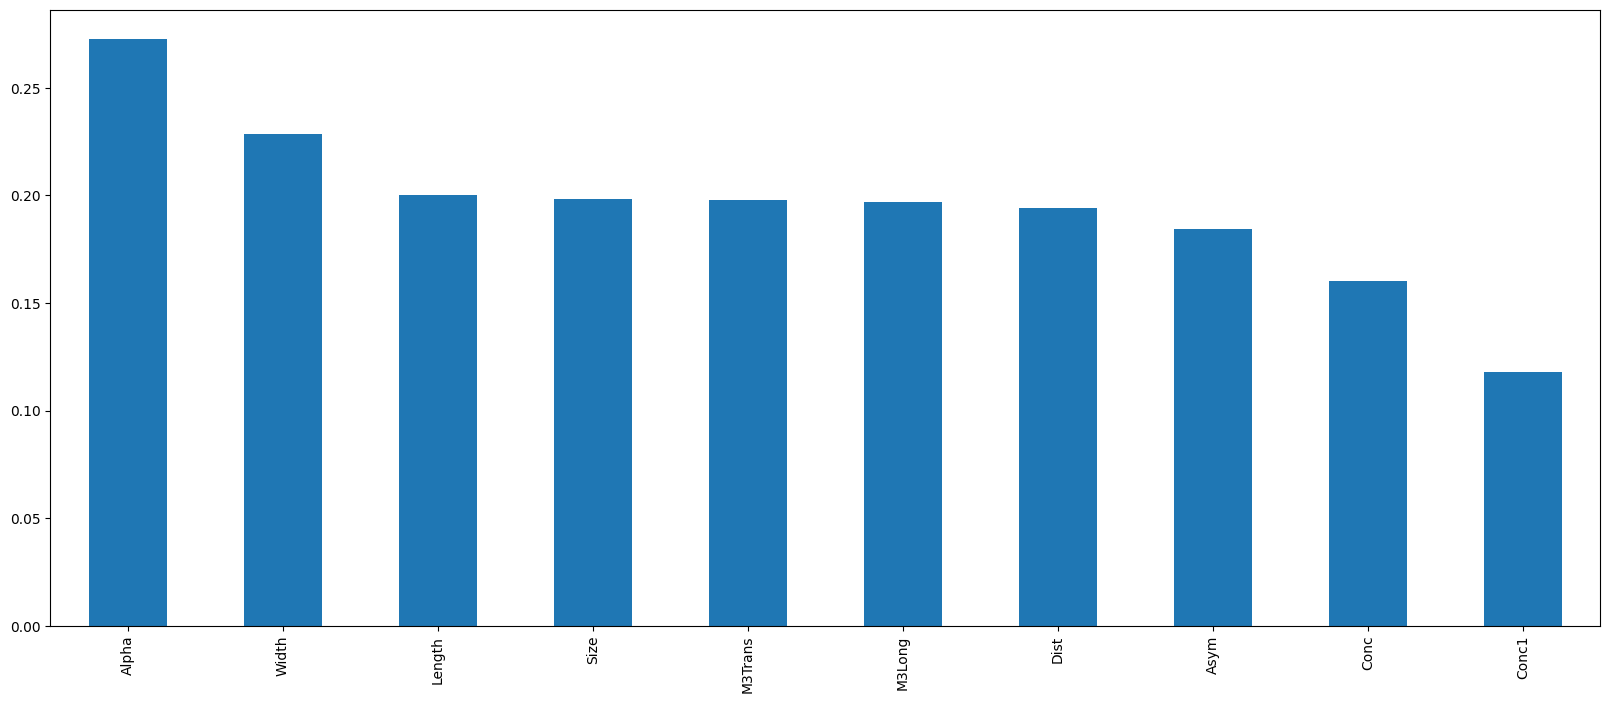

In [ ]:
#ploting the dependencies
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
classifiers = [('knn',KNeighborsClassifier(n_neighbors=7)),('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier())]
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {score}")
    print('\n',classification_report(y_test, y_pred, target_names=['gamma', 'hadron']))

knn Accuracy: 0.7603779429987608

               precision    recall  f1-score   support

       gamma       0.75      0.78      0.77      3252
      hadron       0.77      0.74      0.75      3204

    accuracy                           0.76      6456
   macro avg       0.76      0.76      0.76      6456
weighted avg       0.76      0.76      0.76      6456

Decision Tree Accuracy: 0.8909541511771994

               precision    recall  f1-score   support

       gamma       0.93      0.85      0.89      3252
      hadron       0.86      0.94      0.90      3204

    accuracy                           0.89      6456
   macro avg       0.89      0.89      0.89      6456
weighted avg       0.89      0.89      0.89      6456

Random Forest Accuracy: 0.9332403965303594

               precision    recall  f1-score   support

       gamma       0.95      0.92      0.93      3252
      hadron       0.92      0.95      0.93      3204

    accuracy                           0.93      6456
   